<a href="https://colab.research.google.com/github/sanchezcarlosjr/minimum-viable-products/blob/main/3_Interpolation_and_Polynomial_Approximation_Numerical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Interpolation and Polynomial Approximation
### Illustration

By [Carlos Eduardo Sanchez Torres](https://twitter.com/CharllierJr)

[Numerical analysis](https://www.notion.so/sanchezcarlosjr/Numerical-analysis-f774bbfddd834cf1beffda5e9e935ff8)

Burden, Richard L., and J. Douglas Faires. Numerical Analysis. 7th ed. Belmont, CA: Brooks Cole, 2000. ISBN: 0534382169. Page 105

In [ ]:
def interpolate(table: list, i=-1, j=-1) -> float:
   """
    Interpolate v1 using Neville Method

    :param table = [[x0, f(x0)], [x1, f(x1)], ... [xn, f(xn)]]
   """
   if i==-1 and j==-1:
      i = len(table)-1
      j = i
   if j == 0:
     return table[i][1]
   subProblem1=(2.1 - table[i-j][0])*interpolate(table, i, j-1) 
   subProblem2=(2.1 - table[i][0])*interpolate(table, i-1,j-1)
   subProblems = subProblem1-subProblem2
   diffX = (table[i][0]-table[i-j][0])
   return subProblems/diffX

interpolate([[2, 0.6931], [2.2, 0.7885], [2.3, 0.8329]])

0.7418999999999999

In [ ]:
def interpolate(table: list, i=-1, j=-1) -> float:
   """
    Interpolate v2 using Neville Method and lambda calculus

    :param table = [[x0, f(x0)], [x1, f(x1)], ... [xn, f(xn)]]
   """
   if i==-1 and j==-1:
      i = len(table)-1
      j = i
   if j == 0:
     return lambda x: table[i][1] # f(xi)
   subProblem1=lambda x: (x - table[i-j][0])*interpolate(table, i, j-1)(x) # (x-x_{i-j})Q_{i,j-1}-(x-x_i)Q_{i-1,j-1}
   subProblem2=lambda x: (x - table[i][0])*interpolate(table, i-1,j-1)(x)
   subProblems = lambda x: subProblem1(x)-subProblem2(x)
   diffX = (table[i][0]-table[i-j][0]) # x_{i} - x_{i-j}
   return lambda x: subProblems(x)/diffX

Q = interpolate([[2, 0.6931], [2.2, 0.7885], [2.3, 0.8329]])
Q

<function __main__.interpolate.<locals>.<lambda>>

In [ ]:
table = [[2, 0.6931], [2.2, 0.7885], [2.3, 0.8329]]
f = interpolate(table)
f(2.1)

0.7418999999999999

In [ ]:
import numpy as np
def interpolate(table: list, x: float) -> float:
   """
    Interpolate v3 using Neville Method and Dynamic Programming

    :param table = [[x0, f(x0)], [x1, f(x1)], ... [xn, f(xn)]]
   """
   n = len(table)
   Q = np.zeros((n,n))
   for i in range(0, n):
     Q[i][0] = table[i][1] # f(xi)
   for i in range(1, n):
     for j in range(1, i+1):
       QA=(x-table[i-j][0])*Q[i][j-1] 
       QB=(x-table[i][0])*Q[i-1][j-1]
       diffX = (table[i][0]-table[i-j][0])
       Q[i][j] = (QA-QB)/diffX
   return Q
interpolate([[2, 0.6931], [2.2, 0.7885], [2.3, 0.8329]],2.1)

array([[0.6931, 0.    , 0.    ],
       [0.7885, 0.7408, 0.    ],
       [0.8329, 0.7441, 0.7419]])

In [ ]:
import pandas as pd
pd.DataFrame(interpolate([[2, 0.6931], [2.2, 0.7885], [2.3, 0.8329]], 2.1))

,0,1,2
0,0.6931,0.0000,0.0000
1,0.7885,0.7408,0.0000
2,0.8329,0.7441,0.7419


In [ ]:
import pandas as pd
table = [
         [0, -6],
         [0.1, -5.89483],
         [0.3, -5.65014],
         [0.6, -5.17788],
         [1, -4.28172],
         [1.1, -3.99583]
]
matrix=interpolate(table, 0.41)
pd.DataFrame(matrix)

,0,1,2,3,4,5
0,-6.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,-5.89483,-5.568803,0.000000,0.000000,0.00000,0.000000
2,-5.65014,-5.515561,-5.496038,0.000000,0.00000,0.000000
3,-5.17788,-5.476978,-5.491639,-5.493032,0.00000,0.000000
4,-4.28172,-5.603556,-5.496869,-5.493441,-5.49320,0.000000
5,-3.99583,-5.968471,-5.464888,-5.492472,-5.49314,-5.493178


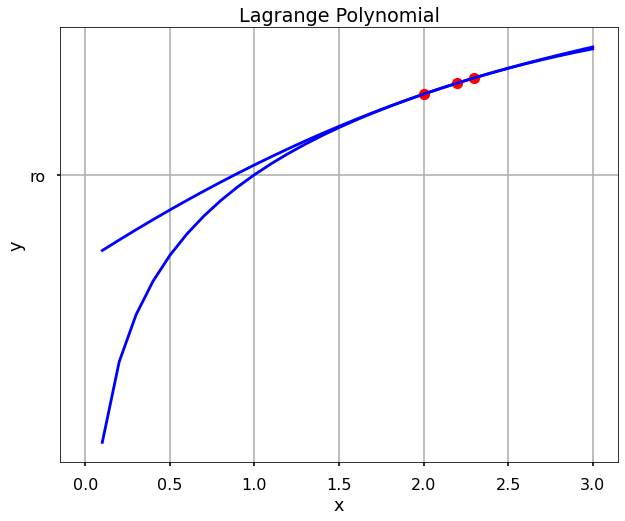

In [ ]:
import matplotlib.pyplot as plt
x=np.array(table)[:,0]
y=np.array(table)[:,1]
plt.style.use('seaborn-poster')
x_new = np.arange(0.1, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.plot(x_new, np.log(x_new), 'b', 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
census_of_the_population_of_united_states = [
        [1950, 151326],
        [1960, 179323],
        [1970, 226542],
        [1980, 249542],
        [1990, 281422],
        [2000, 281422]
]

interpolate(census_of_the_population_of_united_states)

374636405667648.0